In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_out_metazoa.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          7.3627 ( 7.1025,  7.7650) ( 7.0677,  7.7110)  0.6433 (Jnode 106)\n',
 't_n56          7.2122 ( 7.0484,  7.3935) ( 7.0460,  7.3899)  0.3438 (Jnode 105)\n',
 't_n57          6.9444 ( 6.8213,  7.0763) ( 6.8210,  7.0756)  0.2546 (Jnode 104)\n',
 't_n58          6.4250 ( 6.3499,  6.5054) ( 6.3480,  6.5025)  0.1545 (Jnode 103)\n',
 't_n59          6.3304 ( 6.2568,  6.4056) ( 6.2547,  6.4029)  0.1482 (Jnode 102)\n',
 't_n60          6.1878 ( 6.1127,  6.2619) ( 6.1105,  6.2589)  0.1484 (Jnode 101)\n',
 't_n61          5.9749 ( 5.8934,  6.0519) ( 5.8931,  6.0513)  0.1582 (Jnode 100)\n',
 't_n62          3.4928 ( 2.9214,  3.9604) ( 2.9910,  4.0151)  1.0241 (Jnode 99)\n',
 't_n63          5.1283 ( 5.0352,  5.2214) ( 5.0328,  5.2187)  0.1859 (Jnode 98)\n',
 't_n64          4.4560 ( 4.4038,  4.5159) ( 4.4018,  4.5133)  0.1114 (Jnode 97)\n',
 't_n65          4.2170 ( 4.2069,  4.2448) ( 4.2060,  4.2379)  0.0319 (Jnode 96)\n',
 't_n66          3.5703 ( 3.5221,  3.6231) ( 3.5187,  3.61

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[7.3627,
 7.2122,
 6.9444,
 6.425,
 6.3304,
 6.1878,
 5.9749,
 3.4928,
 5.1283,
 4.456,
 4.217,
 3.5703,
 3.1836,
 1.9952,
 0.8954,
 4.363,
 6.2532,
 6.1311,
 5.9907,
 4.982,
 4.6494,
 5.0669,
 6.1639,
 6.016,
 5.8856,
 5.7119,
 5.4688,
 5.3754,
 5.153,
 4.9941,
 4.7751,
 3.9954,
 3.7857,
 5.0633,
 4.4961,
 6.0966,
 1.7157,
 6.0083,
 5.808,
 5.4795,
 5.3089,
 4.3827,
 4.7916,
 5.2597,
 5.1153,
 4.8732,
 3.8979,
 4.7564,
 6.4248,
 5.1638,
 3.5967,
 2.7471,
 5.5612]

In [7]:
lower_ci_iqtree

[7.1025,
 7.0484,
 6.8213,
 6.3499,
 6.2568,
 6.1127,
 5.8934,
 2.9214,
 5.0352,
 4.4038,
 4.2069,
 3.5221,
 3.1799,
 1.9095,
 0.746,
 4.1134,
 6.1768,
 5.9968,
 5.9149,
 4.7105,
 4.3203,
 5.0439,
 6.0988,
 5.9495,
 5.8167,
 5.6494,
 5.4247,
 5.3385,
 5.1403,
 4.9896,
 4.7075,
 3.7779,
 3.5334,
 4.9825,
 4.292,
 6.0305,
 1.1203,
 5.9471,
 5.7576,
 5.4516,
 5.3001,
 4.1262,
 4.7097,
 5.1508,
 4.9953,
 4.692,
 3.5281,
 4.4164,
 6.3231,
 4.8615,
 3.1509,
 1.9468,
 4.9058]

In [8]:
upper_ci_iqtree

[7.765,
 7.3935,
 7.0763,
 6.5054,
 6.4056,
 6.2619,
 6.0519,
 3.9604,
 5.2214,
 4.5159,
 4.2448,
 3.6231,
 3.1934,
 2.0468,
 1.0466,
 4.5642,
 6.3298,
 6.2343,
 6.0643,
 5.1737,
 4.9098,
 5.1258,
 6.2321,
 6.0862,
 5.957,
 5.7773,
 5.5162,
 5.4164,
 5.1774,
 5.0056,
 4.8316,
 4.1871,
 4.0102,
 5.1547,
 4.6883,
 6.1658,
 2.3527,
 6.0733,
 5.861,
 5.4974,
 5.3304,
 4.5722,
 4.8951,
 5.3683,
 5.2475,
 5.0519,
 4.2499,
 5.0437,
 6.5589,
 5.4733,
 4.1176,
 3.5735,
 6.3443]

In [9]:
file_LG = open("LG_out_metazoa.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

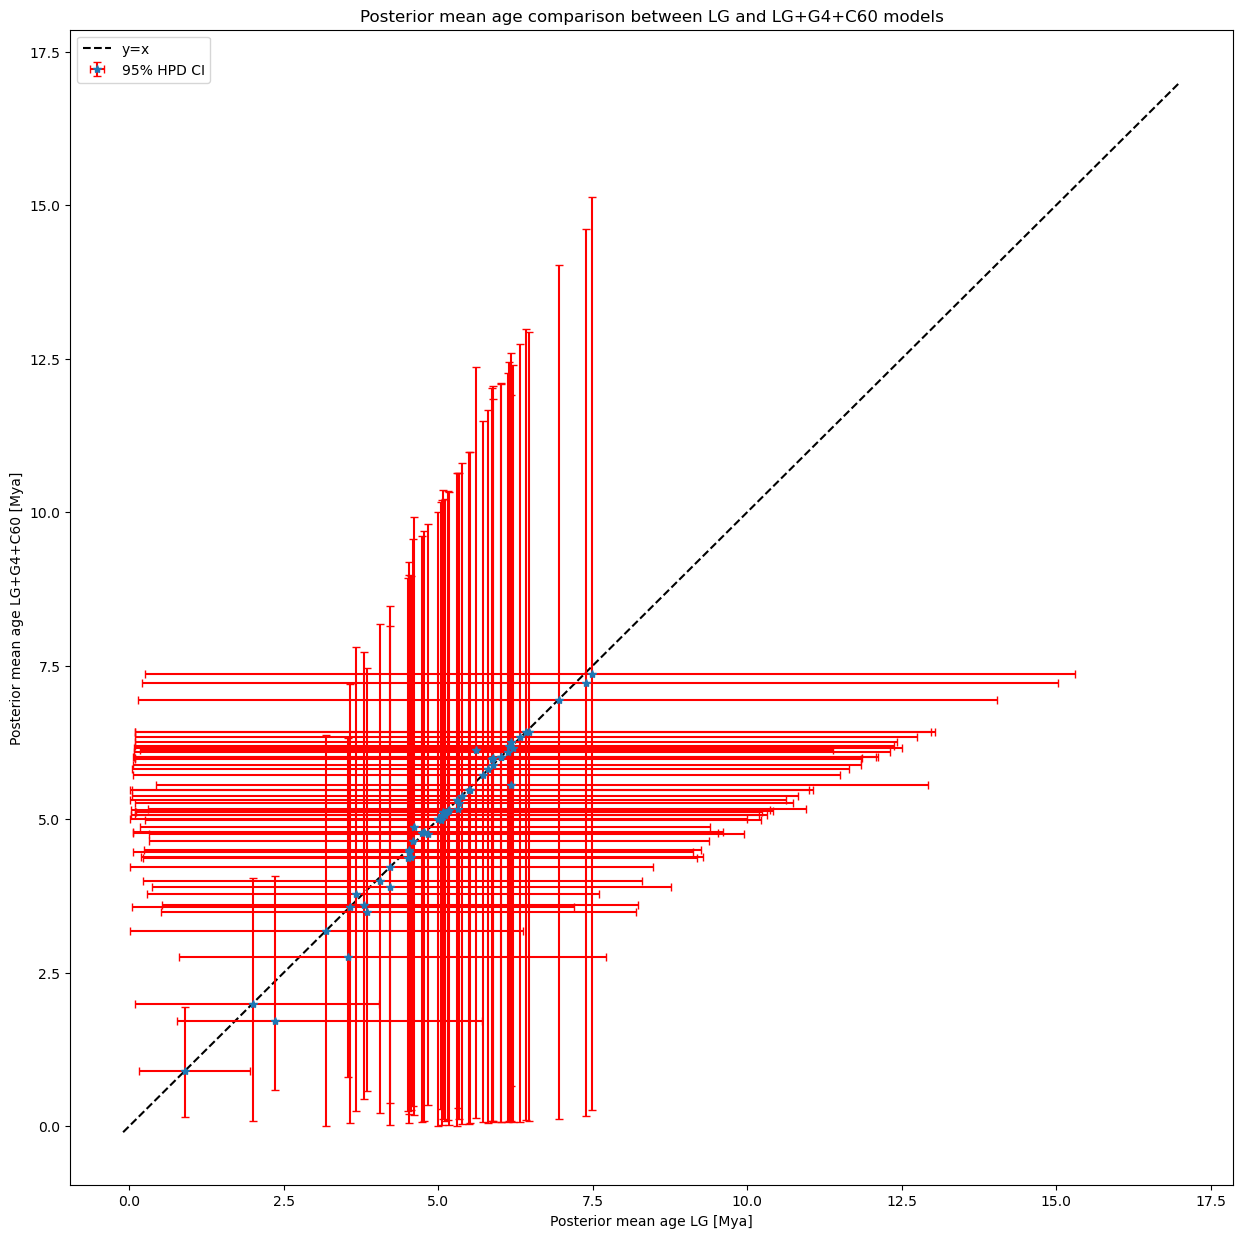

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60.png')

In [11]:
posterior_mean_baseml

[7.4911,
 7.3964,
 6.9498,
 6.4699,
 6.3265,
 6.1441,
 5.8753,
 3.8412,
 5.16,
 4.5272,
 4.2181,
 3.5757,
 3.1836,
 1.9962,
 0.9026,
 4.502,
 6.1696,
 5.6121,
 5.8873,
 5.0402,
 4.59,
 5.0676,
 6.2106,
 6.0191,
 5.8889,
 5.7199,
 5.5053,
 5.3881,
 5.1681,
 4.9932,
 4.7366,
 4.0586,
 3.6735,
 5.1133,
 4.5308,
 6.12,
 2.3637,
 6.0107,
 5.7972,
 5.4903,
 5.3047,
 4.5604,
 4.7632,
 5.3275,
 5.0688,
 4.6125,
 4.2131,
 4.8278,
 6.4171,
 5.3121,
 3.7973,
 3.5464,
 6.1761]

In [12]:
posterior_mean_iqtree

[7.3627,
 7.2122,
 6.9444,
 6.425,
 6.3304,
 6.1878,
 5.9749,
 3.4928,
 5.1283,
 4.456,
 4.217,
 3.5703,
 3.1836,
 1.9952,
 0.8954,
 4.363,
 6.2532,
 6.1311,
 5.9907,
 4.982,
 4.6494,
 5.0669,
 6.1639,
 6.016,
 5.8856,
 5.7119,
 5.4688,
 5.3754,
 5.153,
 4.9941,
 4.7751,
 3.9954,
 3.7857,
 5.0633,
 4.4961,
 6.0966,
 1.7157,
 6.0083,
 5.808,
 5.4795,
 5.3089,
 4.3827,
 4.7916,
 5.2597,
 5.1153,
 4.8732,
 3.8979,
 4.7564,
 6.4248,
 5.1638,
 3.5967,
 2.7471,
 5.5612]

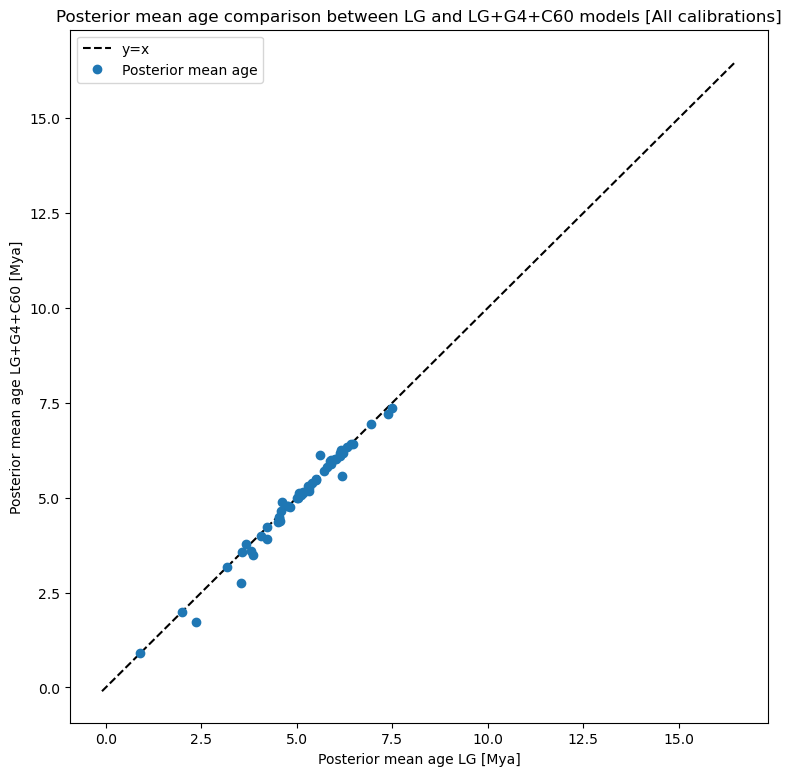

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_scatter.png')

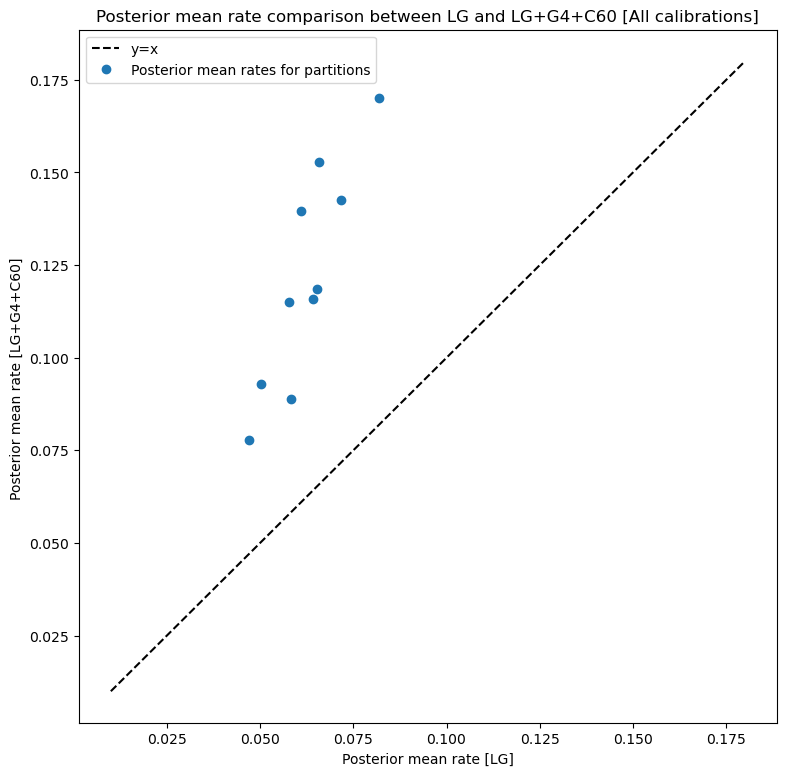

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C60] ')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C60_all_scatter.png')